In [73]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bluepal\Desktop\Data_Analytics_Employees\Excell_sheets\clean_employee_dataset.csv", sep=';')

def safe_split_multi_sep(x):
    if pd.isna(x):
        return []
    x = str(x).replace(';', ',')      
    return [i.strip().title() for i in x.split(',') if i.strip() != '']

df['department'] = df['department'].apply(safe_split_multi_sep)
df['skills'] = df['skills'].apply(safe_split_multi_sep)

df_exploded = df.explode('department').explode('skills')
df_exploded = df_exploded[(df_exploded['department'] != '') & (df_exploded['skills'] != '')]




In [ ]:

df = pd.read_csv(r"C:\Users\Bluepal\Desktop\Data_Analytics_Employees\Excell_sheets\clean_employee_dataset.csv", sep=';')
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(r"[\[\]']", "", regex=True)

df.to_excel(
    r"C:\Users\Bluepal\Desktop\Data_Analytics_Employees\Excell_sheets\clean_employee_dataset_readable.xlsx",
    index=False
)

In [74]:
skill_counts = df_exploded['skills'].value_counts()


In [72]:
skill_dept_counts = df_exploded.groupby(['department','skills']).size().reset_index(name='count')



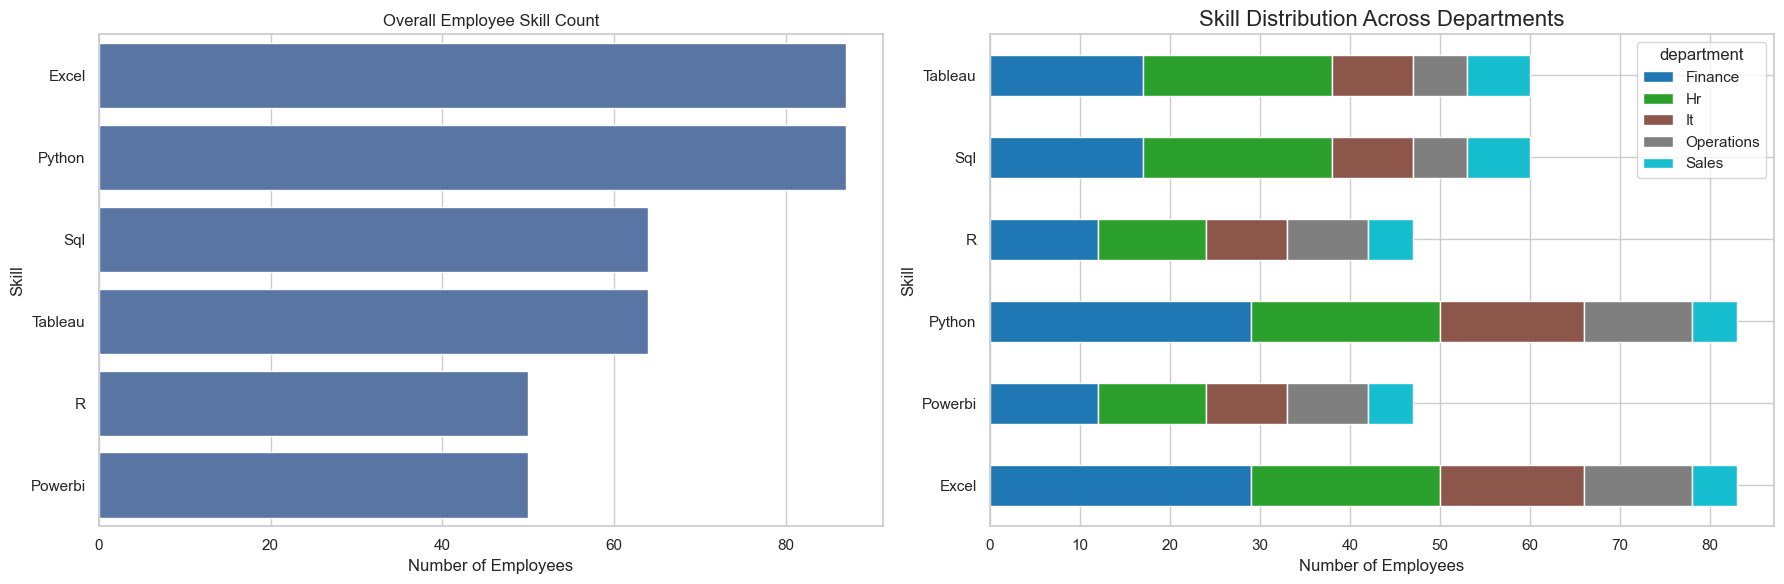

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(x=skill_counts.values, y=skill_counts.index, ax=axes[0])
axes[0].set_title('Overall Employee Skill Count')
axes[0].set_xlabel('Number of Employees')
axes[0].set_ylabel('Skill')

skill_dept_counts = df_exploded.groupby(['skills','department']).size().unstack(fill_value=0)

skill_dept_counts.plot(kind='barh', stacked=True, colormap='tab10', ax=axes[1])
axes[1].set_title('Skill Distribution Across Departments', fontsize=16)
axes[1].set_xlabel('Number of Employees', fontsize=12)
axes[1].set_ylabel('Skill', fontsize=12)


#xx
plt.tight_layout()
plt.show()